# Import supporting package

In [1]:
import copy
import glob
from datetime import datetime

# The package for data structure
import xarray as xr
import pandas as pd
import numpy as np

# The packages for working with uncertainties
from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

# The package for plotting
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18 # Set the global font size

# -------------- The modules written by us --------------

# The packages for read data
from DataContainer.ReadData import read_hdf5_file, read_hdf5_global, read_hdf5_run_time, read_csv_file

# The packages for data analysis
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, Polylog22dModel
from Analyser.FFTAnalyser import fft, ifft, fft_nutou
from ToolFunction.ToolFunction import *

# Add errorbar plot to xarray package
from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

## Start a client for parallel computing

In [2]:
from dask.distributed import Client
client = Client(n_workers=6, threads_per_worker=10, processes=True, memory_limit='10GB')
client

<Client: 'tcp://127.0.0.1:62557' processes=6 threads=60, memory=55.88 GiB>

# Load Data

## With 10 Hz Modulation

In [3]:
filePath = r'F:\Jianshun\AccordionLatticeShorTermStability\withModulation.csv'

data = read_csv_file(filePath, csvEngine='pandas', csvKwargs=dict(header=[0], skiprows=[1], encoding = "ISO-8859-1",))
dataWithModulation = xr.DataArray(
    data=data.CH1[0,:],
    dims=['x'],
    coords=dict(
        x=data.X[0,:].to_numpy() * 2e-3
    )
)
dataWithModulation

<xarray.DataArray 'CH1' (x: 1200)>
array([0.59 , 0.648, 0.62 , ..., 0.612, 0.576, 0.638])
Coordinates:
  * x        (x) float64 0.0 0.002 0.004 0.006 0.008 ... 2.392 2.394 2.396 2.398

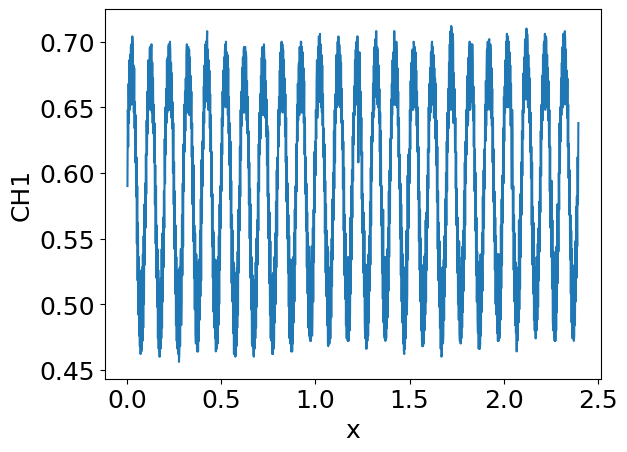

In [4]:
dataWithModulation.plot.errorbar()
plt.show()

In [5]:
dataWithModulation = dataWithModulation - dataWithModulation.mean()

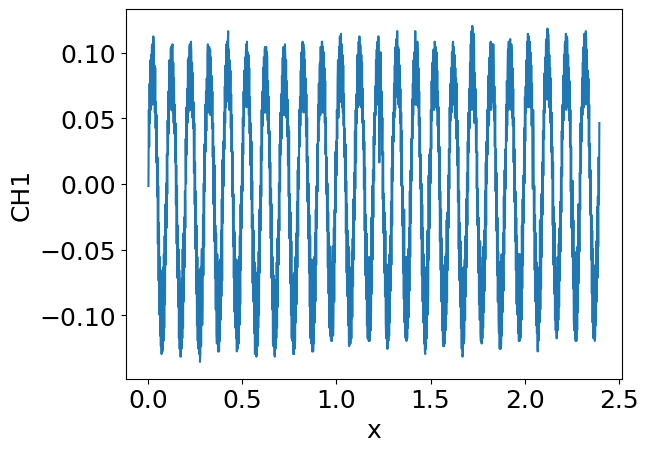

In [6]:
fig = plt.figure()
ax = fig.gca()

dataWithModulation.plot.errorbar(ax=ax)
# ax.set_xlim([0.5, 1])
# ax.set_ylim([0, 0.25])
plt.show()

In [7]:
dataWithModulationFFT = fft(dataWithModulation)

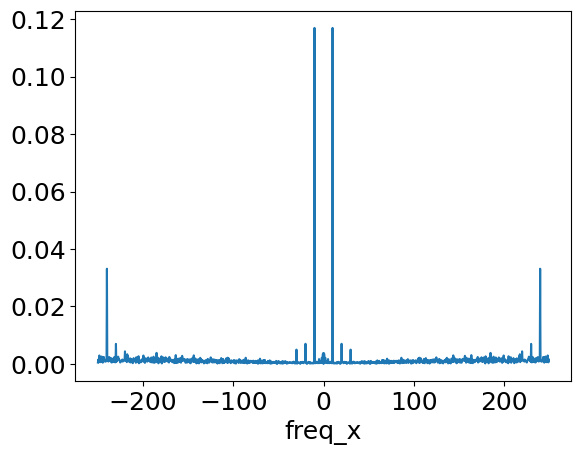

In [8]:
fig = plt.figure()
ax = fig.gca()

abs(dataWithModulationFFT).plot.errorbar(ax=ax, x='freq_x')
# ax.set_xlim([0.5, 1])
# ax.set_ylim([0, 0.25])
plt.show()

## Without Modulation

In [9]:
filePath = r'F:\Jianshun\AccordionLatticeShorTermStability\withoutModulation.csv'

data = read_csv_file(filePath, csvEngine='pandas', csvKwargs=dict(header=[0], skiprows=[1], encoding = "ISO-8859-1",))
dataWithoutModulation = xr.DataArray(
    data=data.CH1[0,:],
    dims=['x'],
    coords=dict(
        x=data.X[0,:].to_numpy() * 2e-3
    )
)
dataWithoutModulation

<xarray.DataArray 'CH1' (x: 1200)>
array([0.59 , 0.74 , 0.75 , ..., 0.744, 0.738, 0.586])
Coordinates:
  * x        (x) float64 0.0 0.002 0.004 0.006 0.008 ... 2.392 2.394 2.396 2.398

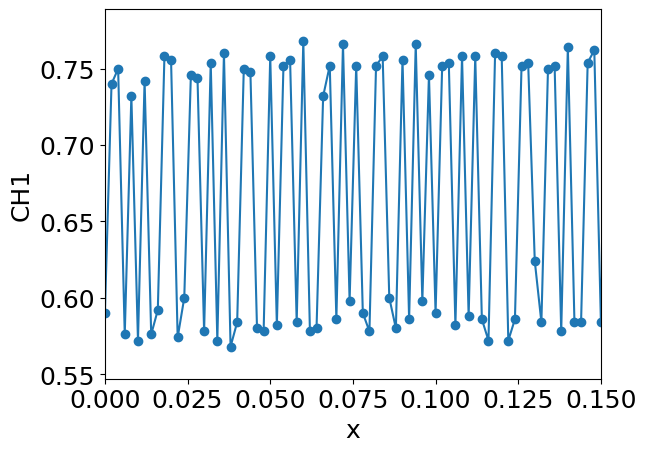

In [10]:
dataWithoutModulation.plot.errorbar(fmt='o-')
plt.xlim([0, 0.15])
plt.show()

In [11]:
dataWithoutModulation = dataWithoutModulation - dataWithoutModulation.mean()

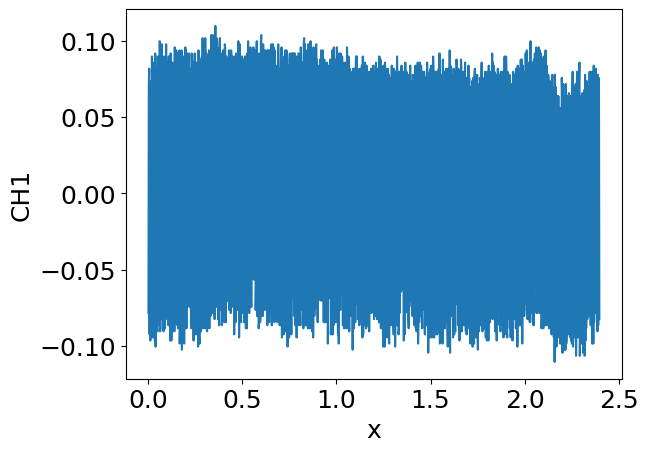

In [12]:
fig = plt.figure()
ax = fig.gca()

dataWithoutModulation.plot.errorbar(ax=ax)
# ax.set_xlim([0.5, 1])
# ax.set_ylim([0, 0.25])
plt.show()

In [13]:
dataWithModulationFFT = fft(dataWithModulation)

In [14]:
dataWithoutModulationFFT = fft(dataWithoutModulation)

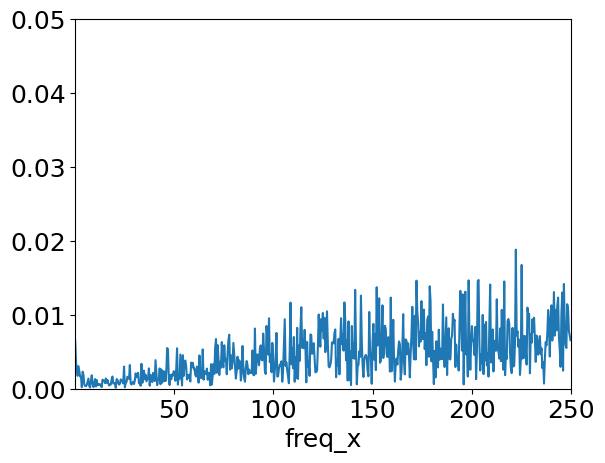

In [15]:
fig = plt.figure()
ax = fig.gca()

abs(dataWithoutModulationFFT).plot.errorbar(ax=ax, x='freq_x')
ax.set_xlim([0.5, 250])
ax.set_ylim([0, 0.05])
plt.show()

## Dark

In [16]:
filePath = r'F:\Jianshun\AccordionLatticeShorTermStability\dark.csv'

data = read_csv_file(filePath, csvEngine='pandas', csvKwargs=dict(header=[0], skiprows=[1], encoding = "ISO-8859-1",))
dataDark = xr.DataArray(
    data=data.CH1[0,:],
    dims=['x'],
    coords=dict(
        x=data.X[0,:].to_numpy() * 2e-3
    )
)
dataDark

<xarray.DataArray 'CH1' (x: 1200)>
array([-0.0376, -0.0336, -0.0328, ..., -0.0328, -0.0336, -0.0388])
Coordinates:
  * x        (x) float64 0.0 0.002 0.004 0.006 0.008 ... 2.392 2.394 2.396 2.398

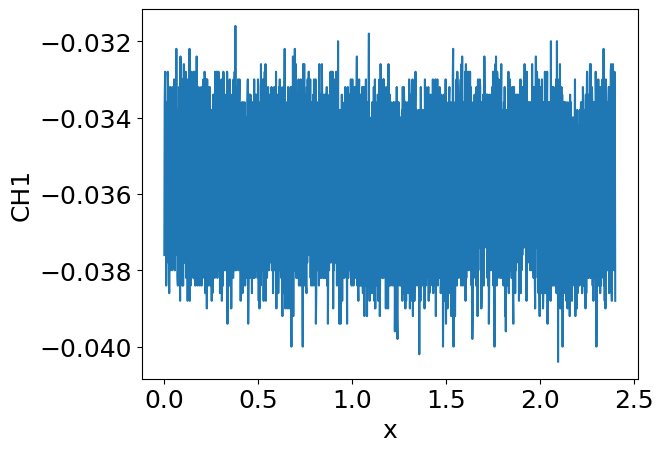

In [17]:
dataDark.plot.errorbar()
plt.show()

In [18]:
dataDark = dataDark - dataDark.mean()

In [19]:
dataDarkFFT = fft(dataDark)

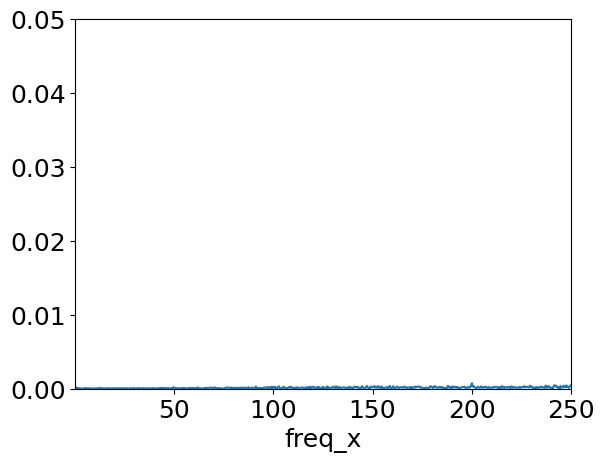

In [20]:
fig = plt.figure()
ax = fig.gca()

abs(dataDarkFFT).plot.errorbar(ax=ax, x='freq_x')
ax.set_xlim([0.5, 250])
ax.set_ylim([0, 0.05])
plt.show()

## Only One Beam

In [21]:
filePath = r'F:\Jianshun\AccordionLatticeShorTermStability\onlyOneBeam.csv'

data = read_csv_file(filePath, csvEngine='pandas', csvKwargs=dict(header=[0], skiprows=[1], encoding = "ISO-8859-1",))
dataOnlyOneBeam = xr.DataArray(
    data=data.CH1[0,:],
    dims=['x'],
    coords=dict(
        x=data.X[0,:].to_numpy() * 2e-3
    )
)
dataOnlyOneBeam

<xarray.DataArray 'CH1' (x: 1200)>
array([0.229, 0.242, 0.241, ..., 0.225, 0.225, 0.235])
Coordinates:
  * x        (x) float64 0.0 0.002 0.004 0.006 0.008 ... 2.392 2.394 2.396 2.398

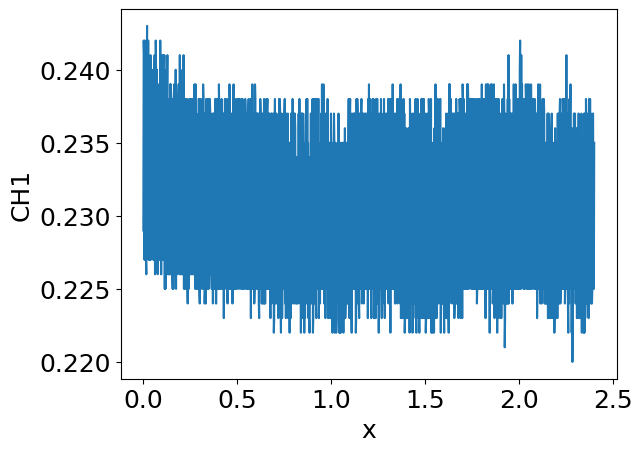

In [22]:
dataOnlyOneBeam.plot.errorbar()
plt.show()

In [23]:
dataOnlyOneBeam = dataOnlyOneBeam - dataOnlyOneBeam.mean()

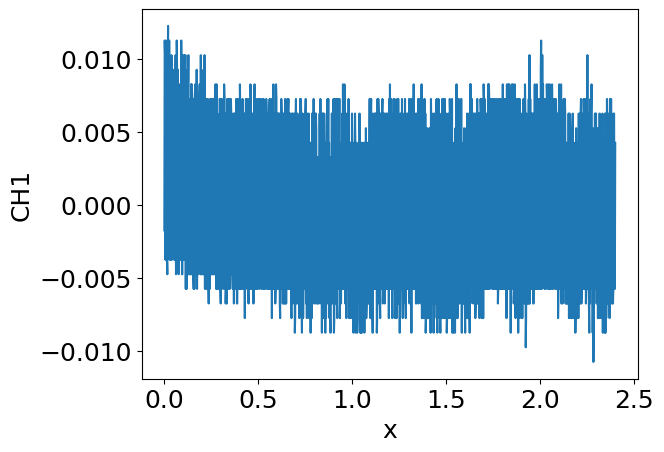

In [58]:
dataOnlyOneBeam.plot.errorbar()
plt.show()

In [24]:
dataOnlyOneBeamFFT = fft(dataOnlyOneBeam)

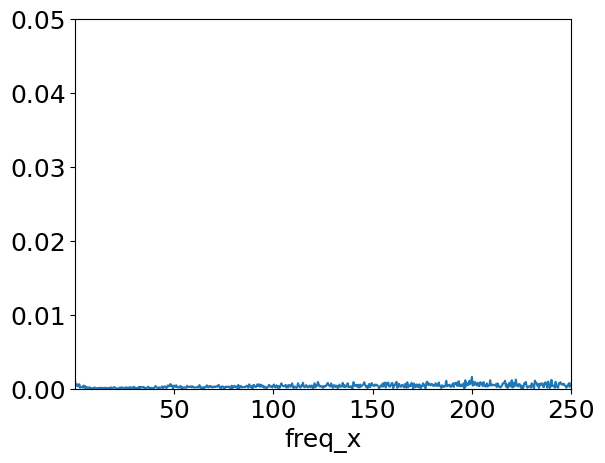

In [25]:
fig = plt.figure()
ax = fig.gca()

abs(dataOnlyOneBeamFFT).plot.errorbar(ax=ax, x='freq_x')
ax.set_xlim([0.5, 250])
ax.set_ylim([0, 0.05])
plt.show()

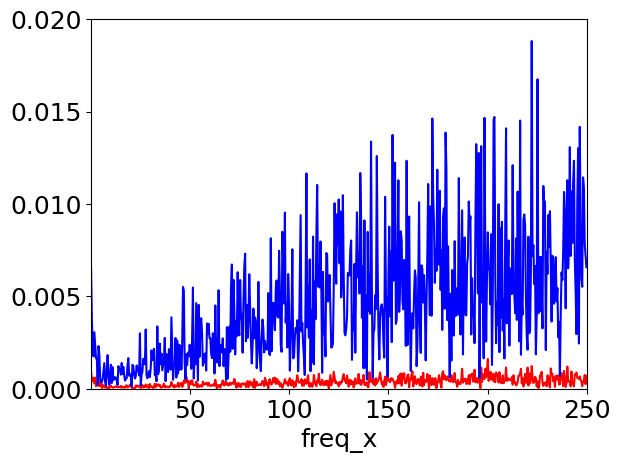

In [26]:
fig = plt.figure()
ax = fig.gca()

abs(dataOnlyOneBeamFFT).plot.errorbar(ax=ax, x='freq_x', fmt='r')
abs(dataWithoutModulationFFT).plot.errorbar(ax=ax, x='freq_x', fmt='b')

ax.set_xlim([0.5, 250])
ax.set_ylim([0, 0.02])
plt.show()

## Without Modulation # 2

In [27]:
filePath = r'F:\Jianshun\AccordionLatticeShorTermStability\withoutModulation_2.csv'

data = read_csv_file(filePath, csvEngine='pandas', csvKwargs=dict(header=[0], skiprows=[1], encoding = "ISO-8859-1",))
dataWithoutModulation2 = xr.DataArray(
    data=data.CH1[0,:],
    dims=['x'],
    coords=dict(
        x=data.X[0,:].to_numpy() * 1e-05
    )
)
dataWithoutModulation2

<xarray.DataArray 'CH1' (x: 1200)>
array([0.49 , 0.53 , 0.533, ..., 0.522, 0.498, 0.454])
Coordinates:
  * x        (x) float64 0.0 1e-05 2e-05 3e-05 ... 0.01197 0.01198 0.01199

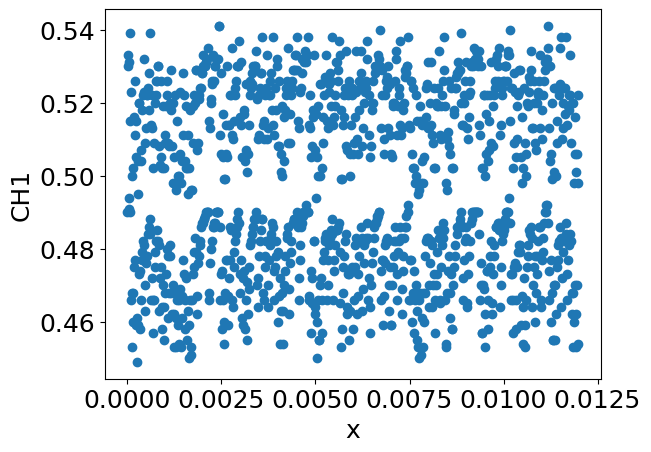

In [28]:
dataWithoutModulation2.plot.errorbar(fmt='o')
# plt.xlim([0, 0.0075])
plt.show()

In [29]:
dataWithoutModulation2 = dataWithoutModulation2 - dataWithoutModulation2.mean()

In [30]:
dataWithoutModulationFFT2 = fft(dataWithoutModulation2)

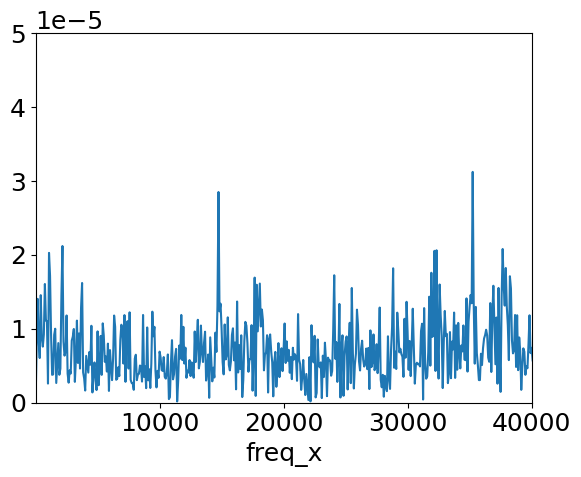

In [31]:
fig = plt.figure()
ax = fig.gca()

abs(dataWithoutModulationFFT2).plot.errorbar(ax=ax, x='freq_x')
ax.set_xlim([1, 40000])
ax.set_ylim([0, 0.00005])
plt.show()

## Only One Beam # 2

In [32]:
filePath = r'F:\Jianshun\AccordionLatticeShorTermStability\onlyOneBeam_2.csv'

data = read_csv_file(filePath, csvEngine='pandas', csvKwargs=dict(header=[0], skiprows=[1], encoding = "ISO-8859-1",))
dataOnlyOneBeam2 = xr.DataArray(
    data=data.CH1[0,:],
    dims=['x'],
    coords=dict(
        x=data.X[0,:].to_numpy() * 1e-05
    )
)
dataOnlyOneBeam2

<xarray.DataArray 'CH1' (x: 1200)>
array([0.215, 0.197, 0.195, ..., 0.194, 0.218, 0.198])
Coordinates:
  * x        (x) float64 0.0 1e-05 2e-05 3e-05 ... 0.01197 0.01198 0.01199

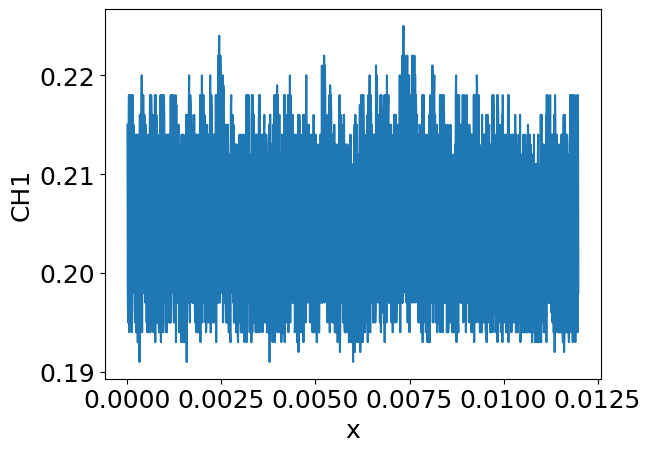

In [33]:
dataOnlyOneBeam2.plot.errorbar()
plt.show()

In [34]:
dataOnlyOneBeam2 = dataOnlyOneBeam2 - dataOnlyOneBeam2.mean()

In [35]:
dataOnlyOneBeamFFT2 = fft(dataOnlyOneBeam2)

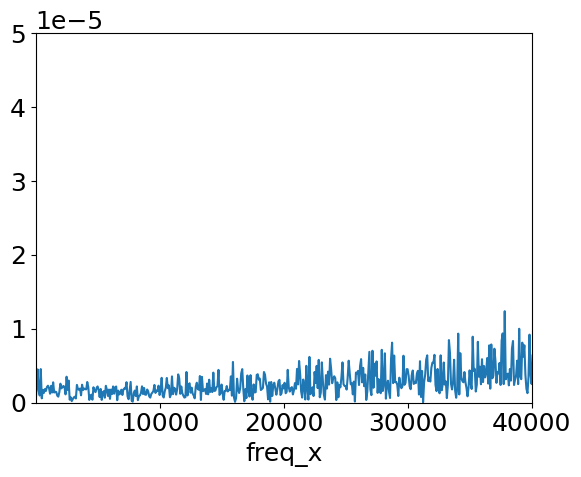

In [36]:
fig = plt.figure()
ax = fig.gca()

abs(dataOnlyOneBeamFFT2).plot.errorbar(ax=ax, x='freq_x')
ax.set_xlim([1, 40000])
ax.set_ylim([0, 0.00005])
plt.show()

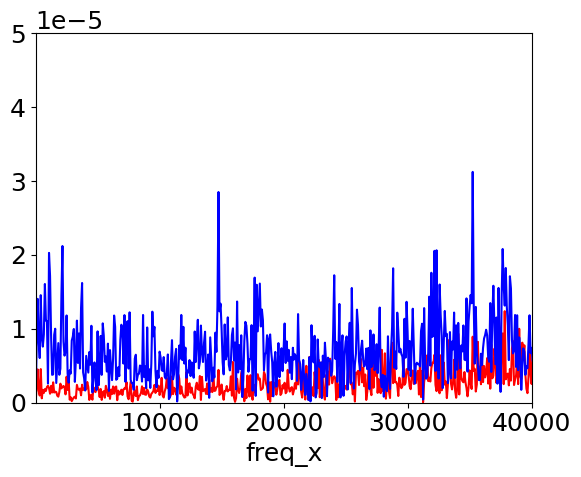

In [37]:
fig = plt.figure()
ax = fig.gca()

abs(dataOnlyOneBeamFFT2).plot.errorbar(ax=ax, x='freq_x', fmt='r')
abs(dataWithoutModulationFFT2).plot.errorbar(ax=ax, x='freq_x', fmt='b')

ax.set_xlim([1, 40000])
ax.set_ylim([0, 0.00005])
plt.show()

# Data analyse

## Transform intensity to phase

In [38]:
from Analyser.FitAnalyser import NewFitModel

In [39]:
def sine_with_offset(x, amplitude=1.0, frequency=1.0, shift=0.0, offset=0.0):
    """Return a sinusoidal function.

    sine(x, amplitude, frequency, shift) =
        amplitude * sin(x*frequency + shift)

    """
    return amplitude*np.sin(x*frequency + shift) + offset

In [40]:
fitModel = NewFitModel(sine_with_offset)
fitAnalyser = FitAnalyser(fitModel, fitDim=1)

In [41]:
params = fitAnalyser.fitModel.make_params()
params.add(name="amplitude", value=  0.1, max=np.inf, min=-np.inf, vary=True)
params.add(name="frequency", value=  63, max=np.inf, min=-np.inf, vary=True)
params.add(name="shift", value=  0.11, max=np.inf, min=-np.inf, vary=True)
params.add(name="offset", value=  0.6, max=np.inf, min=-np.inf, vary=True)

In [42]:
# param = fitAnalyser.guess(dataWithModulation)
fitResult = fitAnalyser.fit(dataWithModulation, params)
fitCurve = fitAnalyser.eval(fitResult, x=dataWithModulation.x)

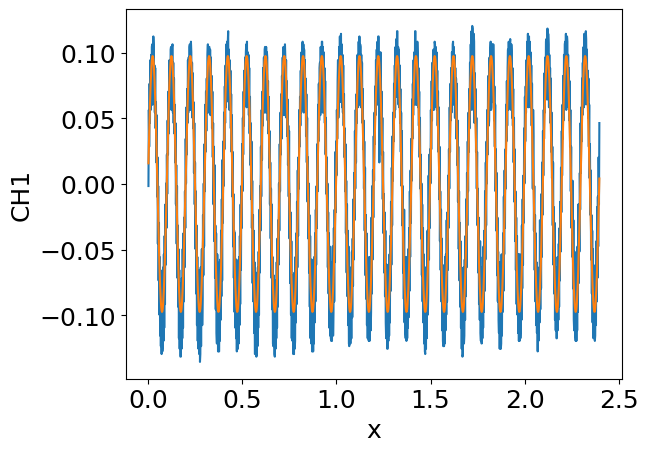

In [43]:
fig = plt.figure()
ax = fig.gca()
dataWithModulation.plot.errorbar(ax=ax)
fitCurve.plot.errorbar(ax=ax)
plt.show()

In [44]:
val = fitAnalyser.get_fit_value(fitResult)
val

<xarray.Dataset>
Dimensions:    ()
Data variables:
    amplitude  float64 0.09749
    frequency  float64 62.83
    shift      float64 0.162
    offset     float64 -5.246e-07

In [45]:
def voltage_to_phase(voltage):
    voltage = (voltage - val.offset)
    # voltage = xr.where(voltage > val.amplitude, voltage % val.amplitude, voltage % val.amplitude - val.amplitude)
    voltage = voltage / val.amplitude
    voltage_frac, b= np.modf(voltage.to_numpy())
    voltage = xr.where(np.abs(voltage) > 1, np.arcsin(voltage_frac) + np.trunc(voltage) * np.pi, np.arcsin(voltage))
    return voltage

In [89]:
phaseWithoutModulation = voltage_to_phase(dataWithoutModulation)

C:\Users\data\AppData\Roaming\Python\Python39\site-packages\xarray\core\computation.py:760: RuntimeWarning: invalid value encountered in arcsin
  result_data = func(*input_data)


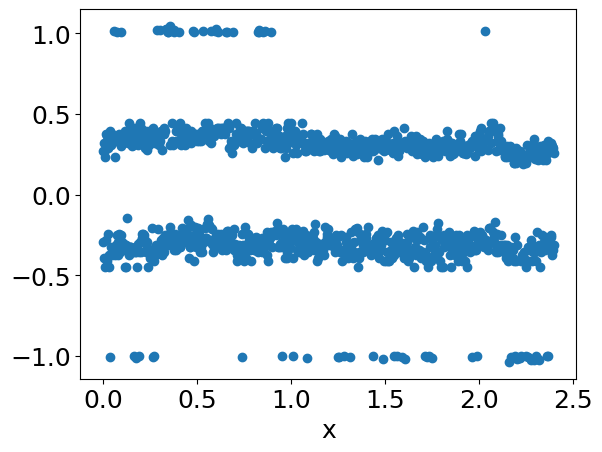

In [126]:
fig = plt.figure()
ax = fig.gca()

(phaseWithoutModulation/np.pi).plot.errorbar(ax=ax, fmt='o')

# ax.set_xlim([0, 0.1])
plt.show()

In [91]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

In [ ]:
def get_noise_spectrum(data):
    dataAutoCorr = autocorr(data)
    dataAutoCorr = xr.DataArray(
        data=dataAutoCorr,
        dims=['x'],
        coords=dict(
            x=data.x
        )
    )
    
    dataNoiseSpec = fft(dataAutoCorr)
    
    return dataNoiseSpec
    

In [92]:
phaseWithoutModulation = phaseWithoutModulation - phaseWithoutModulation.mean()

In [93]:
phaseAutoCorrWithoutModulation = autocorr((phaseWithoutModulation/np.pi))
phaseAutoCorrWithoutModulation = xr.DataArray(
    data=phaseAutoCorrWithoutModulation,
    dims=['x'],
    coords=dict(
        x=phaseWithoutModulation.x
    )
)

In [94]:
phaseAutoCorrWithoutModulation

<xarray.DataArray (x: 1200)>
array([ 1.92834649e+02, -7.04156659e+01,  2.53150014e+00, ...,
       -1.15671835e-01, -1.59932171e-01,  9.16532266e-02])
Coordinates:
  * x        (x) float64 0.0 0.002 0.004 0.006 0.008 ... 2.392 2.394 2.396 2.398

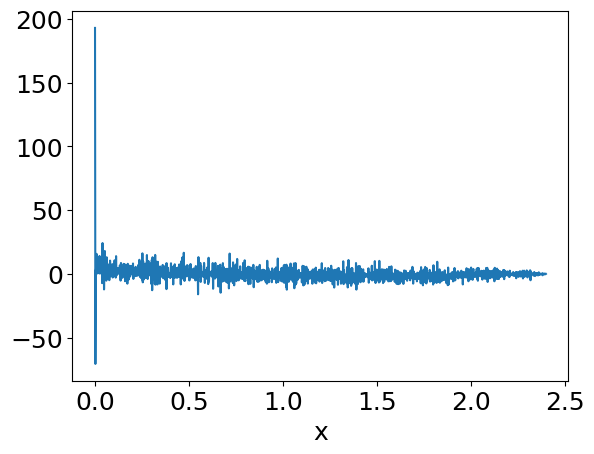

In [95]:
fig = plt.figure()
ax = fig.gca()

phaseAutoCorrWithoutModulation.plot.errorbar(ax=ax)
plt.show()

In [96]:
phaseAutoCorrWithoutModulation.x

<xarray.DataArray 'x' (x: 1200)>
array([0.000e+00, 2.000e-03, 4.000e-03, ..., 2.394e+00, 2.396e+00, 2.398e+00])
Coordinates:
  * x        (x) float64 0.0 0.002 0.004 0.006 0.008 ... 2.392 2.394 2.396 2.398

In [97]:
powerSpecWithoutModulation = fft(phaseAutoCorrWithoutModulation)

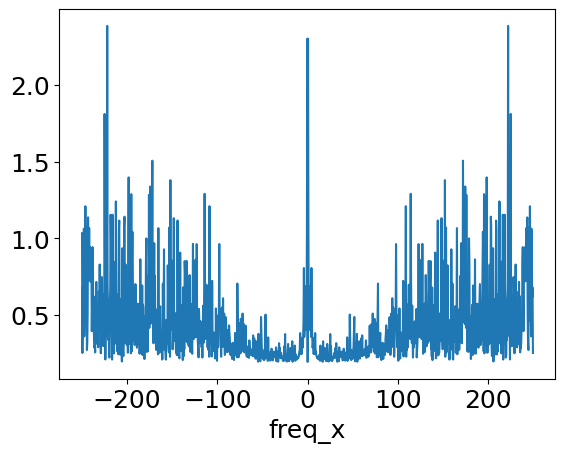

In [98]:
fig = plt.figure()
ax = fig.gca()

abs(powerSpecWithoutModulation).plot.errorbar(ax=ax, x='freq_x')
# ax.set_xlim([0, 250])
# ax.set_ylim([0, 0.001])
plt.show()

In [72]:
phaseAutoCorrWithoutModulation = autocorr((dataWithoutModulation))
phaseAutoCorrWithoutModulation = xr.DataArray(
    data=phaseAutoCorrWithoutModulation,
    dims=['x'],
    coords=dict(
        x=phaseWithoutModulation.x
    )
)

In [73]:
phaseAutoCorrWithoutModulation

<xarray.DataArray (x: 1200)>
array([ 8.13258367e+00, -3.87534581e+00, -1.52647527e-01, ...,
       -7.66522583e-03, -1.13568061e-02,  6.45748028e-03])
Coordinates:
  * x        (x) float64 0.0 0.002 0.004 0.006 0.008 ... 2.392 2.394 2.396 2.398

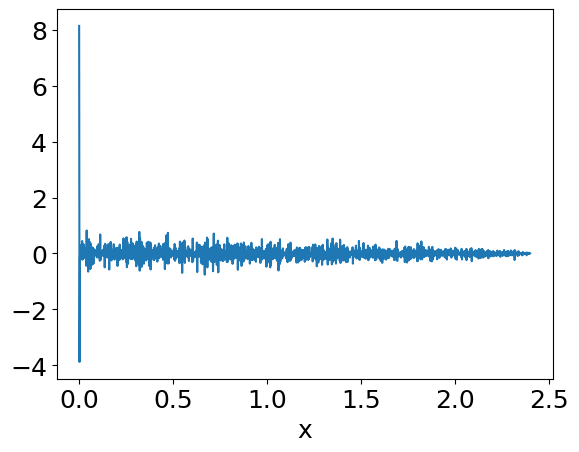

In [74]:
fig = plt.figure()
ax = fig.gca()

phaseAutoCorrWithoutModulation.plot.errorbar(ax=ax)
plt.show()

In [75]:
phaseAutoCorrWithoutModulation.x

<xarray.DataArray 'x' (x: 1200)>
array([0.000e+00, 2.000e-03, 4.000e-03, ..., 2.394e+00, 2.396e+00, 2.398e+00])
Coordinates:
  * x        (x) float64 0.0 0.002 0.004 0.006 0.008 ... 2.392 2.394 2.396 2.398

In [76]:
powerSpecWithoutModulation = fft(phaseAutoCorrWithoutModulation)

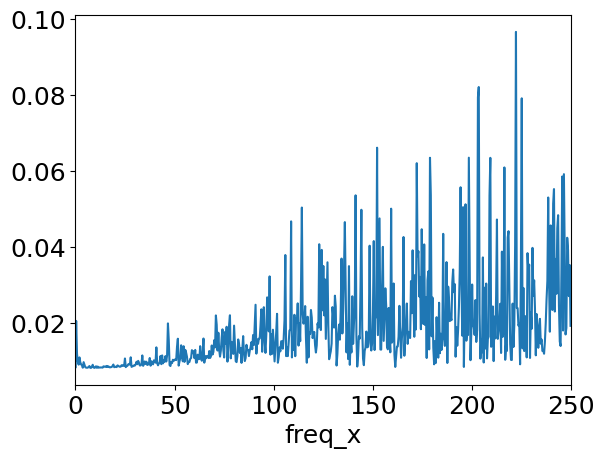

In [77]:
fig = plt.figure()
ax = fig.gca()

abs(powerSpecWithoutModulation).plot.errorbar(ax=ax, x='freq_x')
ax.set_xlim([0, 250])
# ax.set_ylim([0, 0.001])
plt.show()

In [127]:
dt = 5e-6
samplingFreq = 1/ dt
blockLength = 1200
df = samplingFreq / blockLength
print(str(samplingFreq / 2 / 1e3) + ' kHz')
print(str(df) + ' Hz')

99.99999999999999 kHz
166.66666666666663 Hz


In [122]:
dt = 5e-3
samplingFreq = 1/ dt
blockLength = 1200
df = samplingFreq / blockLength
print(str(samplingFreq / 2 / 1e3) + ' kHz')
print(str(df) + ' Hz')

0.1 kHz
0.16666666666666666 Hz
